<a href="https://colab.research.google.com/github/hyunmila/um/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

In [2]:
conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [3]:
base_dir = '/content/drive/MyDrive/VIII sem/UM/dogs_and_cats_small_2'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validate')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [4]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [5]:
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(4,4,512)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

    return model

model_1 = create_model()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2097665 (8.00 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(val_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 30ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 19ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 19ms/step


In [7]:
history = model_1.fit(
    x = train_features,
    y = train_labels,
    epochs = 30,
    validation_data=(validation_features, validation_labels),
    batch_size=20
)

Epoch 1/30
100/100 [==============================] - 4s 7ms/step - loss: 0.6078 - accuracy: 0.6675 - val_loss: 0.4557 - val_accuracy: 0.8360
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.7895 - val_loss: 0.3806 - val_accuracy: 0.8490
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3694 - accuracy: 0.8360 - val_loss: 0.3290 - val_accuracy: 0.8810
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3352 - accuracy: 0.8565 - val_loss: 0.3065 - val_accuracy: 0.8850
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2857 - accuracy: 0.8890 - val_loss: 0.2879 - val_accuracy: 0.8910
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.8950 - val_loss: 0.2924 - val_accuracy: 0.8740
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2534 - accuracy: 0.8970 - val_loss: 0.2665 - val_accuracy: 0.9030
Epoch 

In [8]:
import pandas as pd
history_df = pd.DataFrame(history.history)
with open("history_3.json", mode='w') as f:
    history_df.to_json(f)

In [26]:
data = pd.read_json("history_3.json")

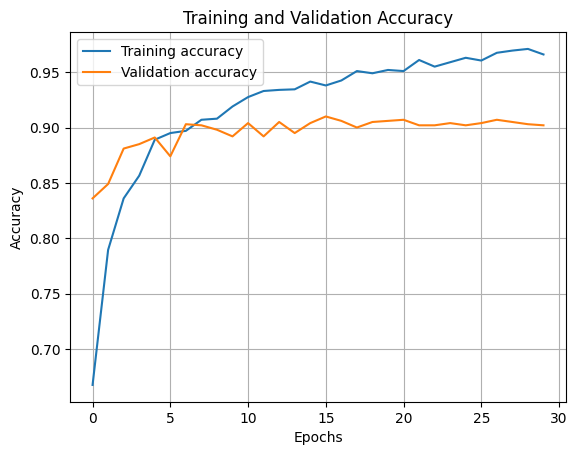

In [27]:
plt.plot(data['accuracy'], label= 'Training accuracy')
plt.plot(data['val_accuracy'], label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()

# plt.xticks(np.arange(0, int(epochs+1)))
plt.legend(loc='best')
plt.show()

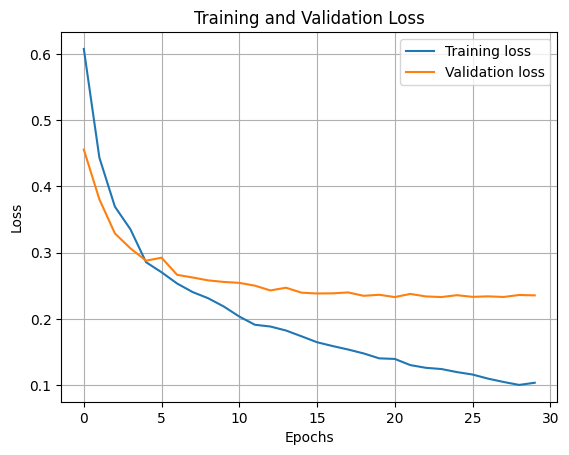

In [28]:
plt.plot(data['loss'], label= 'Training loss')
plt.plot(data['val_loss'], label = 'Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

# plt.xticks(np.arange(0, int(epochs+1)))
plt.legend(loc='best')
plt.show()

Zadanie 2

In [13]:
def create_model_2():
    model = keras.models.Sequential()
    # model.add(keras.layers.Input(shape=(4,4,512)))
    model.add(conv_base)
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1, activation='sigmoid'))


    return model

model_2 = create_model_2()
print('This is the number of trainable weights before freezing the conv base:', len(model_2.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model_2.trainable_weights))
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model_2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model_2.summary()

This is the number of trainable weights before freezing the conv base: 4
This is the number of trainable weights before freezing the conv base: 4
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Traina

In [10]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model_2.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    batch_size=20
)

Epoch 1/30
100/100 [==============================] - 30s 264ms/step - loss: 0.6890 - accuracy: 0.5845 - val_loss: 0.5170 - val_accuracy: 0.7910
Epoch 2/30
100/100 [==============================] - 26s 262ms/step - loss: 0.5684 - accuracy: 0.7095 - val_loss: 0.4249 - val_accuracy: 0.8470
Epoch 3/30
100/100 [==============================] - 26s 259ms/step - loss: 0.5165 - accuracy: 0.7500 - val_loss: 0.3830 - val_accuracy: 0.8520
Epoch 4/30
100/100 [==============================] - 26s 258ms/step - loss: 0.4684 - accuracy: 0.7785 - val_loss: 0.3449 - val_accuracy: 0.8670
Epoch 5/30
100/100 [==============================] - 26s 256ms/step - loss: 0.4495 - accuracy: 0.7810 - val_loss: 0.3254 - val_accuracy: 0.8840
Epoch 6/30
100/100 [==============================] - 25s 254ms/step - loss: 0.4446 - accuracy: 0.7925 - val_loss: 0.3106 - val_accuracy: 0.8860
Epoch 7/30
100/100 [==============================] - 27s 268ms/step - loss: 0.4158 - accuracy: 0.8090 - val_loss: 0.2996 - val_ac

In [14]:
history_df = pd.DataFrame(history.history)
with open("history_4.json", mode='w') as f:
    history_df.to_json(f)

In [29]:
data_4 = pd.read_json("history_4.json")

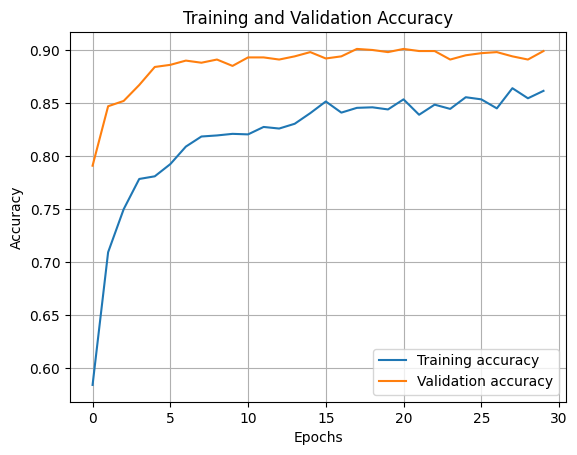

In [30]:
plt.plot(data_4['accuracy'], label= 'Training accuracy')
plt.plot(data_4['val_accuracy'], label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()

# plt.xticks(np.arange(0, int(epochs+1)))
plt.legend(loc='best')
plt.show()

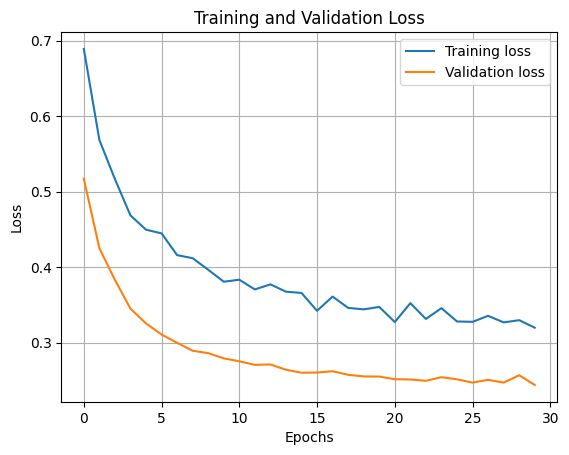

In [31]:
plt.plot(data_4['loss'], label= 'Training loss')
plt.plot(data_4['val_loss'], label = 'Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

# plt.xticks(np.arange(0, int(epochs+1)))
plt.legend(loc='best')
plt.show()

In [15]:
history = model_2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

<ipython-input-15-235d92cf7a1d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_2.fit_generator(


Epoch 1/100
100/100 [==============================] - 29s 267ms/step - loss: 0.6317 - accuracy: 0.6470 - val_loss: 0.4173 - val_accuracy: 0.8350
Epoch 2/100
100/100 [==============================] - 28s 276ms/step - loss: 0.4532 - accuracy: 0.7890 - val_loss: 0.3177 - val_accuracy: 0.8610
Epoch 3/100
100/100 [==============================] - 26s 258ms/step - loss: 0.3937 - accuracy: 0.8175 - val_loss: 0.2830 - val_accuracy: 0.8710
Epoch 4/100
100/100 [==============================] - 26s 261ms/step - loss: 0.3422 - accuracy: 0.8530 - val_loss: 0.2305 - val_accuracy: 0.9040
Epoch 5/100
100/100 [==============================] - 26s 259ms/step - loss: 0.3256 - accuracy: 0.8600 - val_loss: 0.2095 - val_accuracy: 0.9150
Epoch 6/100
100/100 [==============================] - 26s 257ms/step - loss: 0.2968 - accuracy: 0.8695 - val_loss: 0.2108 - val_accuracy: 0.9050
Epoch 7/100
100/100 [==============================] - 26s 256ms/step - loss: 0.2795 - accuracy: 0.8830 - val_loss: 0.1922 -

In [16]:
history_df = pd.DataFrame(history.history)
with open("history_5.json", mode='w') as f:
    history_df.to_json(f)

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


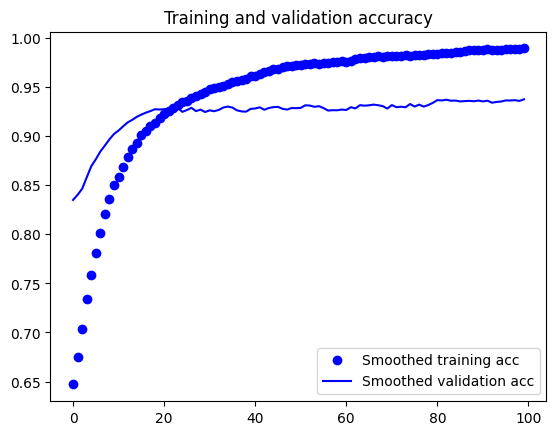

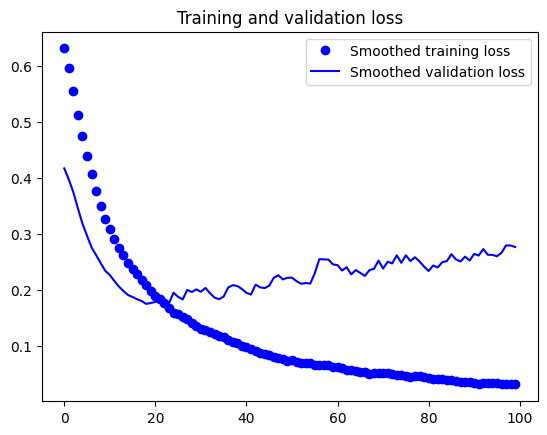

In [24]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

epochs = history.epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model_2.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


<ipython-input-25-c71da5d1b48a>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model_2.evaluate_generator(test_generator, steps=50)


test acc: 0.9380000233650208
